# Output variable -> y
y -> Whether the client has subscribed a term deposit or not ------- Binomial ("yes" or "no")

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
data=pd.read_csv("C:\\Users\\Anks\\Downloads\\bank-full.csv",sep=";")

In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
data.shape

(45211, 17)

In [12]:
data = data.dropna()
data.shape

(45211, 17)

In [15]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [18]:
data.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

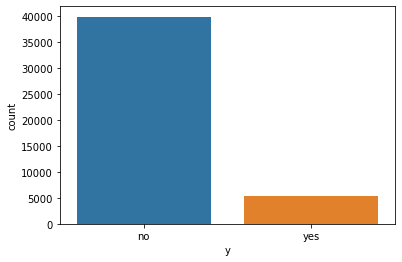

In [19]:
sns.countplot(x="y",data=data)

In [20]:
data1 = data[data["y"] == "yes"]
data2 = data[data["y"] == "no"]

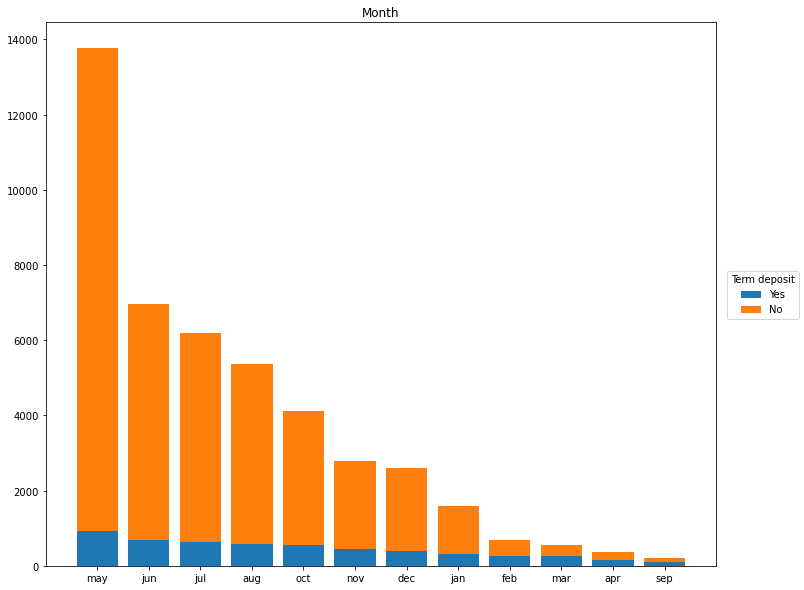

In [21]:
fig,ax = plt.subplots(figsize = (12,10))
ax.bar(data1["month"].unique(),height=data1["month"].value_counts())
ax.bar(data2["month"].unique(),height=data2["month"].value_counts(),bottom=data1["month"].value_counts())
ax.title.set_text("Month")
plt.figlegend( ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

In [22]:
data["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [23]:
# Dividing data into input and output variables

x = data.iloc[:,0:16]
y = data.iloc[:,16]

In [24]:
x = pd.get_dummies(x)
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [25]:
# Logistic Regression Model fit
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [26]:
classifier = LogisticRegression(random_state=0,multi_class="auto",max_iter=3000)
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=3000, random_state=0)

In [27]:
y_predict = classifier.predict(x_test)

In [28]:
#Confusion Matrix for model accuracy

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_predict)
print(confusion_matrix)

[[7773  190]
 [ 702  378]]


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

print("Accuracy Score : ", accuracy_score(y_test,y_predict))
print("Model Score : ",classifier.score(x_test,y_test))

Accuracy Score :  0.9013601680858122
Model Score :  0.9013601680858122


In [31]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7963
         yes       0.67      0.35      0.46      1080

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



In [32]:
from sklearn.preprocessing import  label_binarize

y_test = label_binarize(y_test,classes=['no','yes'])
y_predict = label_binarize(y_predict,classes=['no','yes'])


Text(0, 0.5, 'True Positive Rate')

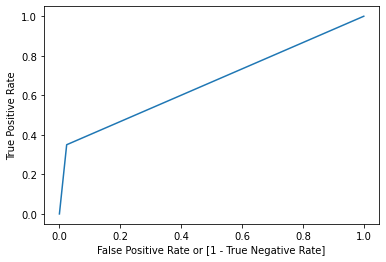

In [33]:
# ROC Curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,_ = roc_curve(y_test,y_predict)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [34]:
auc = roc_auc_score(y_test,y_predict)
auc

0.6630698229310562